# Data Split

### 클래스 별 이미지 파일 개수 확인

In [2]:
path = "C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\project\\"

for folder in os.listdir(path):
    files = gb.glob(pathname=str(path + folder + '/*jpg'))
    print(f'For data, found {len(files)} in folder {folder}')

For data, found 1118 in folder Billiard
For data, found 476 in folder Bowling
For data, found 523 in folder Cycling
For data, found 540 in folder Golf
For data, found 606 in folder MachineRunning
For data, found 313 in folder Pingpong


### 클래스 내부 파일명 변경

In [60]:
# 한글명 파일은 데이터 분리가 불가능하여 인덱스 값을 순차적으로 부여 (0 ~ )

path = "C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\project\\"

for folder in os.listdir(path):
    files = gb.glob(pathname=str(path + folder + '/*jpg'))
    for idx, name in enumerate(files):
        dst = path + folder + '\\' + str(idx) + '.jpg'
        os.rename(name, dst)

### Train / Test / Validation 폴더 분할

In [3]:
# proejct -> new_project (폴더명)
# train 8, test 1, validation 1

import splitfolders

splitfolders.ratio('project', output="pr_data", seed=43, ratio=(.8, .1, .1))
# splitfolders.ratio('project', output="new_project", seed=43, ratio=(.8, .1, .1))

Copying files: 3576 files [00:27, 130.37 files/s]


In [4]:
# train 폴더의 각 클래스 별 이미지 개수

path = "C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\train\\"

for folder in os.listdir(path):
    files = gb.glob(pathname=str(path + folder + '/*jpg'))
    print(f'For train data, found {len(files)} in folder {folder}')

For train data, found 670 in folder Billiard
For train data, found 285 in folder Bowling
For train data, found 313 in folder Cycling
For train data, found 324 in folder Golf
For train data, found 363 in folder MachineRunning
For train data, found 187 in folder Pingpong


In [5]:
# test 폴더의 각 클래스 별 이미지 개수

path = "C:\\Users\\SAMSUNG\\Desktop\\MyPy\\project\\new_project\\test\\"

for folder in os.listdir(path):
    files = gb.glob(pathname=str(path + folder + '/*jpg'))
    print(f'For test data, found {len(files)} in folder {folder}')

For test data, found 225 in folder Billiard
For test data, found 96 in folder Bowling
For test data, found 106 in folder Cycling
For test data, found 108 in folder Golf
For test data, found 122 in folder MachineRunning
For test data, found 64 in folder Pingpong


### 훈련 데이터 확인

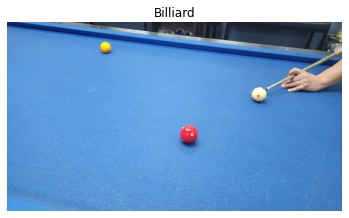

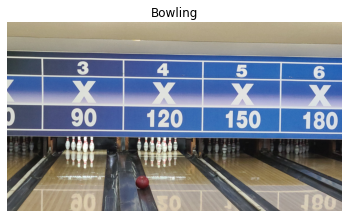

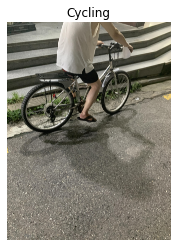

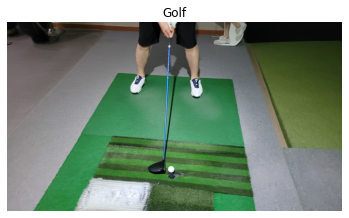

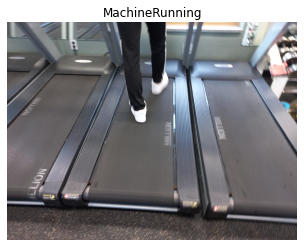

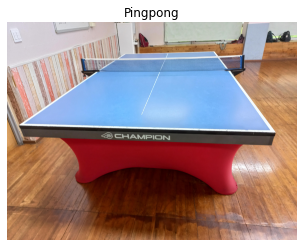

In [16]:
trn_path = 'C://Users\SAMSUNG\Desktop\MyPy\project\\new_project\\train'

for i in os.listdir(trn_path):
    img_class = (os.path.join(trn_path, i))
    img = os.listdir(img_class)
    img_path = os.path.join(trn_path, img_class, img[0])
    image = cv2.imread(img_path)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(i)
    plt.show()

### 데이터 비율 확인

In [35]:
def proportion_labels(labels, dataset):
    series = pd.DataFrame(labels).reset_index()
    series.rename(columns = {0:'labels'}, inplace=True)
    final_s = series.groupby('labels').count().reset_index()
    ticks = [key for key in class_labels.keys()]
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(121)
    plt.bar(np.array(final_s['labels']), np.array(final_s['index']))
    plt.xticks(ticks=np.array(final_s['labels']), labels=ticks, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(visible=True)
    plt.title("Number of images per class", size=14, weight='bold')
    
    plt.subplot(122)
    plt.pie(final_s['index'].ravel(),
            labels=ticks,
            autopct='%1.2f%%',
            textprops={'fontweight':'bold'}
           )
    plt.title("proportion of classes", size=14, weight='bold')
    
    plt.suptitle(f"Proportion of {dataset} data", size=20, weight='bold')
    plt.show()
    
    return final_s

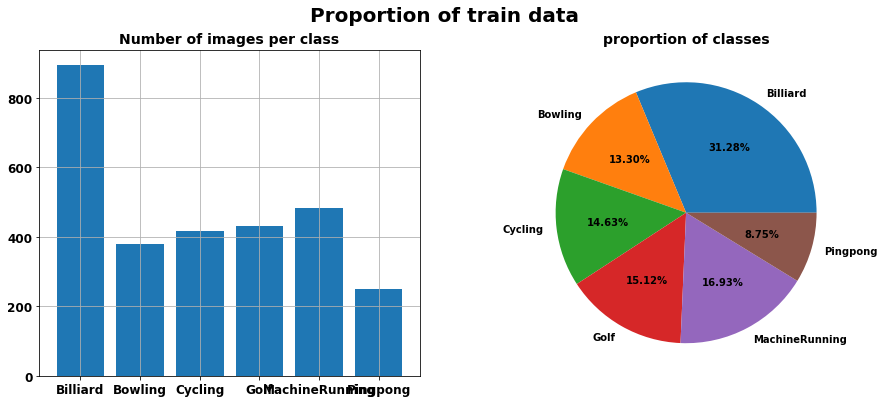

In [37]:
final_s = proportion_labels(train_label, "train")

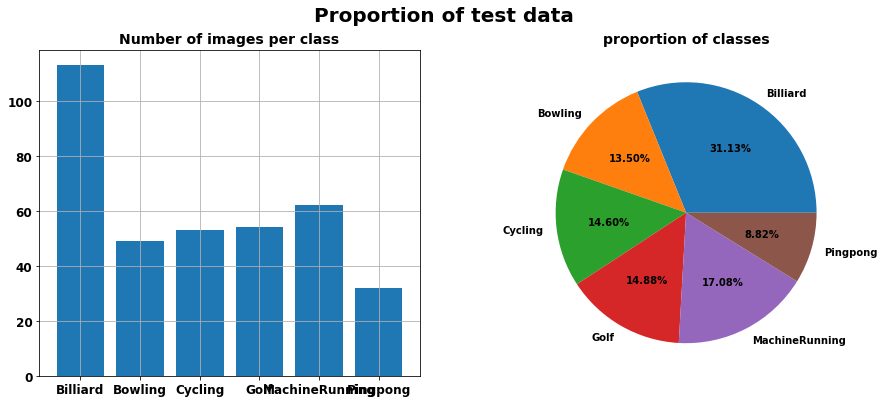

In [38]:
test_d = proportion_labels(test_label, "test")